In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist
from numpy.linalg import norm 

# import n-by-2 matrix as csv file

In [2]:
data = pd.read_csv("matrixnby2.csv")

In [3]:
matrix = np.array(data)

# Kmeans to identify clusters and plot 

In [4]:
#kmeans to identify clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(matrix)
y_kmeans = kmeans.predict(matrix)

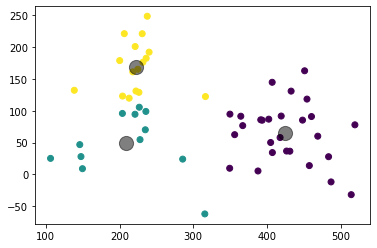

In [5]:
#plot clusters and cluster centers
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# MST

In [6]:
distances_edges = pdist(centers, 'euclidean')
distances_edges

array([216.26900571, 226.09161362, 120.69259858])

In [7]:
#generate matrix of nodes and edges 
edge_matrix = np.zeros((len(centers), len(centers)))

for i in range(len(centers)-1):
    for j in range(i+1, len(centers)):
        edge_matrix[i][j] = distance.euclidean(centers[i],centers[j])
        
print(edge_matrix)



[[  0.         216.26900571 226.09161362]
 [  0.           0.         120.69259858]
 [  0.           0.           0.        ]]


In [8]:
matrix_mst = csr_matrix(edge_matrix + edge_matrix.T) #generate adjacency matrix for MST
MST = minimum_spanning_tree(matrix_mst)
MST.toarray().astype(int) #MST matrix

array([[  0, 216,   0],
       [  0,   0, 120],
       [  0,   0,   0]])

In [9]:
#find x and y for plotting the edges
x = []
y = []
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        x_points = (centers[i][0], centers[j][0])
        y_points = (centers[i][1], centers[j][1])
        x.append(x_points)
        y.append(y_points)
print(x,y)

[(424.0398471565975, 208.4010511130199), (424.0398471565975, 222.93487747534897), (208.4010511130199, 222.93487747534897)] [(65.71018454861209, 49.21192790283917), (65.71018454861209, 169.02624775979), (49.21192790283917, 169.02624775979)]


In [10]:
#looking for non-zero elements of the MST matrix
MST.nonzero()

(array([0, 1], dtype=int32), array([1, 2], dtype=int32))

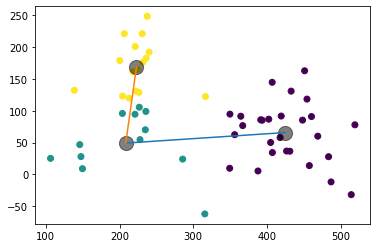

In [11]:
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#deciding edges according to the MST matrix
plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()

# Projection

In [12]:
#find the labels to identify cells in different clusters
labels = kmeans.labels_
labels

array([1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
#find the position of each cell
c1_points_position = list(np.where(labels == 0)[0])
c2_points_position = list(np.where(labels == 1)[0])
c3_points_position = list(np.where(labels == 2)[0])

#find the edges that connect two cluster centers
v12 = centers[0].reshape(-1,1)-centers[1].reshape(-1,1)
v23 = centers[1].reshape(-1,1)-centers[2].reshape(-1,1)

In [14]:
#projection for cluster 1
project_value_list1 = []
for ele in c1_points_position:
    x1 = matrix[ele].reshape(-1,1)  - centers[0].reshape(-1,1)
    project_value1 = (x1.T@(v12))/(v12.T@v12)
    project_value_list1.append(project_value1)
print(project_value_list1)

[array([[0.1571243]]), array([[-0.08885243]]), array([[-0.3327895]]), array([[0.17559036]]), array([[0.20392765]]), array([[-0.01344048]]), array([[0.06233689]]), array([[-0.26609424]]), array([[0.26020303]]), array([[0.0212173]]), array([[-0.09406418]]), array([[-0.09297464]]), array([[0.00086446]]), array([[0.13491965]]), array([[-0.03230306]]), array([[0.15804607]]), array([[0.26170877]]), array([[-0.14333125]]), array([[-0.05110819]]), array([[-0.3643849]]), array([[-0.18896868]]), array([[-0.31457771]]), array([[0.11767523]]), array([[0.38069644]]), array([[-0.2592939]]), array([[-0.13452741]]), array([[0.44240038]])]


In [15]:
#projection for cluster 3
project_value_list3 = []
for ele in c3_points_position:
    x3 = matrix[ele].reshape(-1,1) - centers[2].reshape(-1,1)
    project_value3 = (x3.T@(v23))/(v23.T@v23)
    project_value_list3.append(project_value3)
print(project_value_list3)

[array([[0.38721282]]), array([[0.31362103]]), array([[-0.206524]]), array([[-0.26028624]]), array([[-0.43523992]]), array([[-0.66783168]]), array([[-0.05787228]]), array([[0.03006334]]), array([[0.41525433]]), array([[-0.06768947]]), array([[-0.41194585]]), array([[0.07042935]]), array([[-0.12372781]]), array([[0.32656151]]), array([[0.39688741]]), array([[0.29108748]])]


In [16]:
#projection for cluster 2
project_value_list21 = []
project_value_list23 = []
for ele in c2_points_position:
    d1 = np.linalg.norm(matrix[ele] - centers[0])
    d2 = np.linalg.norm(matrix[ele] - centers[2])
    x2 = matrix[ele].reshape(-1,1) - centers[1].reshape(-1,1)
    if d1 < d2:
        project_value21 = (x2.T@(v12))/(v12.T@v12)
        project_value_list21.append(project_value21)
    else:
        project_value23 = (x2.T@(v23))/(v23.T@v23)
        project_value_list23.append(project_value23)


In [17]:
#find the cell order
cell_order_c1 = np.argsort(np.array(project_value_list1).reshape(1, -1))
cell_order_c1

array([[19,  2, 21,  7, 24, 20, 17, 25, 10, 11,  1, 18, 14,  5, 12,  9,
         6, 22, 13,  0, 15,  3,  4,  8, 16, 23, 26]])

In [18]:
cell_order_c21 = np.argsort(np.array(project_value_list21).reshape(1, -1))
cell_order_c2_combine21 = cell_order_c21[0]+max(cell_order_c1[0])
cell_order_c2_combine21

array([27, 26])

In [19]:
cell_order_c23 = np.argsort(np.array(project_value_list23).reshape(1, -1))
cell_order_c2_combine23 = cell_order_c23[0]+max(cell_order_c2_combine21)
cell_order_c2_combine23

array([34, 33, 32, 36, 31, 35, 27, 28, 29, 30])

In [20]:
cell_order_c3 = np.argsort(np.array(project_value_list3).reshape(1, -1))
cell_order_c3_combine = cell_order_c3[0]+max(cell_order_c2_combine23)
cell_order_c3_combine

array([41, 40, 46, 39, 38, 48, 45, 42, 43, 47, 51, 37, 49, 36, 50, 44])

In [21]:
pt_x = np.hstack(( cell_order_c1[0],cell_order_c2_combine21,cell_order_c2_combine23,cell_order_c3_combine )).ravel()
pt_y = project_value_list1+ project_value_list21+ project_value_list23+project_value_list3

In [22]:
y_values = np.array(pt_y).reshape(1,-1)
y_values

array([[ 0.1571243 , -0.08885243, -0.3327895 ,  0.17559036,  0.20392765,
        -0.01344048,  0.06233689, -0.26609424,  0.26020303,  0.0212173 ,
        -0.09406418, -0.09297464,  0.00086446,  0.13491965, -0.03230306,
         0.15804607,  0.26170877, -0.14333125, -0.05110819, -0.3643849 ,
        -0.18896868, -0.31457771,  0.11767523,  0.38069644, -0.2592939 ,
        -0.13452741,  0.44240038,  0.4548832 ,  0.34684587,  0.08196284,
         0.23495135,  0.29930085,  0.38928352, -0.19838535, -0.38493112,
        -0.43627287, -0.48160528, -0.06403458, -0.37859966,  0.38721282,
         0.31362103, -0.206524  , -0.26028624, -0.43523992, -0.66783168,
        -0.05787228,  0.03006334,  0.41525433, -0.06768947, -0.41194585,
         0.07042935, -0.12372781,  0.32656151,  0.39688741,  0.29108748]])

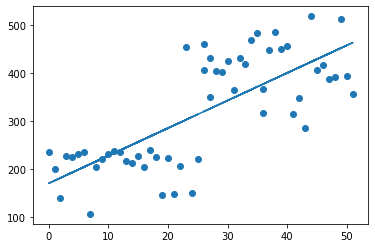

In [23]:
#plot the pseudotime by x
plt.scatter(pt_x, matrix[:,0])
mx,bx = np.polyfit(pt_x, matrix[:,0], 1)
plt.plot(pt_x, mx*pt_x+bx)

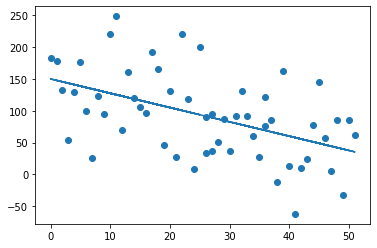

In [24]:
#plot the pseudotime by y
plt.scatter(pt_x, matrix[:,1])
my,by = np.polyfit(pt_x, matrix[:,1], 1)
plt.plot(pt_x, my*pt_x+by)

In [25]:
vector12 = centers[0]-centers[1]
vector23 = centers[1]-centers[2]

In [26]:
points1 = []
for ele in project_value_list1:
    loc1 = centers[0]+ele*vector12
    points1.append(loc1)
print(points1)

x0 = []
y0 = []
for i in range(len(points1)):
    px0 = points1[i][0][0]
    py0 = points1[i][0][1]
    x0.append(px0)
    y0.append(py0)
print(x0,y0)

[array([[457.92194169,  68.30246155]]), array([[404.87981683,  64.24427441]]), array([[352.27751921,  60.2197379 ]]), array([[461.90394122,  68.60711939]]), array([[468.01456036,  69.07463528]]), array([[421.1415574,  65.48844  ]]), array([[437.48209973,  66.73863461]]), array([[366.65960599,  61.32009351]]), array([[480.14971614,  70.00308098]]), array([[428.61512123,  66.06023309]]), array([[403.75596106,  64.1582896 ]]), array([[403.99090875,  64.17626515]]), array([[424.22625833,  65.72444664]]), array([[453.13375758,  67.93612353]]), array([[417.07405456,  65.1772404 ]]), array([[458.12071237,  68.31766925]]), array([[480.4744123 ,  70.02792308]]), array([[393.13206937,  63.34546883]]), array([[413.01893853,  64.86698851]]), array([[345.46432698,  59.69846902]]), array([[383.29086908,  62.59253081]]), array([[356.20468884,  60.52020078]]), array([[449.41519164,  67.65162066]]), array([[506.13277005,  71.99101219]]), array([[368.12602315,  61.43228727]]), array([[395.03051792,  63.

In [27]:
points21 = []
for ele in project_value_list21:
    loc21 = centers[1]+ele*vector12
    points21.append(loc21)
print(points21)
x21 = []
y21 = []
for i in range(len(points21)):
    px21 = points21[i][0][0]
    py21 = points21[i][0][1]
    x21.append(px21)
    y21.append(py21)
print(x21,y21)

[array([[306.49151573,  56.71670761]]), array([[283.19447638,  54.93428004]])]
[306.49151572905345, 283.1944763819196] [56.71670760589125, 54.934280040500795]


In [28]:
points23 = []
for ele in project_value_list23:
    loc23 = centers[1]+ele*vector23
    points23.append(loc23)
print(points23)
x23 = []
y23 = []
for i in range(len(points23)):
    px23 = points23[i][0][0]
    py23 = points23[i][0][1]
    x23.append(px23)
    y23.append(py23)
print(x23,y23)

[array([[207.20981749,  39.39160649]]), array([[204.98630902,  21.06139198]]), array([[204.05106455,  13.3514003 ]]), array([[202.74327202,   2.57018765]]), array([[211.2843494 ,  72.98133419]]), array([[213.99557317,  95.33218826]]), array([[214.74176528, 101.48366536]]), array([[215.40061863, 106.91513695]]), array([[209.33171858,  56.88418753]]), array([[213.90355281,  94.57358849]])]
[207.2098174911421, 204.98630902260925, 204.05106455024915, 202.74327201836505, 211.28434940386416, 213.9955731748036, 214.74176528433284, 215.40061862610992, 209.33171857667264, 213.90355281102268] [39.39160649278305, 21.061391984100716, 13.351400302471681, 2.5701876461932187, 72.98133418648858, 95.33218825593627, 101.48366535886899, 106.91513695227599, 56.884187526056394, 94.57358848843255]


In [29]:
points3 = []
for ele in project_value_list3:
    loc3 = centers[2]+ele*vector23
    points3.append(loc3)
print(points3)
x3 = []
y3 = []
for i in range(len(points3)):
    px3 = points3[i][0][0]
    py3 = points3[i][0][1]
    x3.append(px3)
    y3.append(py3)
print(x3,y3)

[array([[217.30719351, 122.6326065 ]]), array([[218.37676395, 131.4499579 ]]), array([[225.93646143, 193.77078031]]), array([[226.71783248, 200.21226649]]), array([[229.26057892, 221.17422294]]), array([[232.64102717, 249.04204639]]), array([[223.77598318, 175.96017591]]), array([[222.49794213, 165.42422929]]), array([[216.89964321, 119.27283317]]), array([[223.9186645 , 177.13641576]]), array([[228.92202692, 218.38325953]]), array([[221.91126954, 160.58780313]]), array([[224.73311597, 183.85061107]]), array([[218.18868925, 129.89950305]]), array([[217.1665848 , 121.47345291]]), array([[218.70426264, 134.14979981]])]
[217.30719351201213, 218.37676394732657, 225.936461426075, 226.717832481288, 229.26057892123652, 232.64102716510865, 223.77598317812956, 222.49794213156122, 216.8996432113608, 223.91866450154626, 228.9220269218339, 221.91126953676084, 224.7331159709763, 218.18868925388884, 217.16658480224686, 218.70426264423207] [122.63260649648407, 131.44995789807103, 193.7707803133045, 2

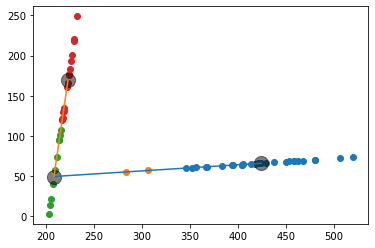

In [30]:
plt.scatter(x0, y0)
plt.scatter(x21, y21)
plt.scatter(x23, y23)
plt.scatter(x3, y3)


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()


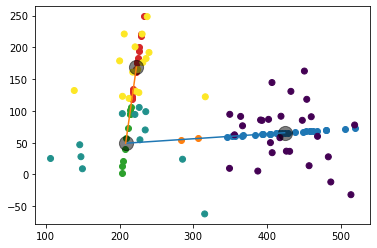

In [31]:
plt.scatter(x0, y0)
plt.scatter(x21, y21)
plt.scatter(x23, y23)
plt.scatter(x3, y3)

plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()

